<a href="https://colab.research.google.com/github/IrinLitvinova/Python-for-DS/blob/master/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_LI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [50]:
import pandas as pd
import plotly as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/medical-charges.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Відповідь 1**
0. Для всіх вивела б базову ставку та потім додавала до неї % від базової залежно від наявності того чи іншого ризику.
1. Розділити датасет на вікові групи, скажімо 4, - діти (до 16), молодь (17- 27), середній вік (28-60), літні (від 60). Аналізувати їх окремо. Очевидно, що в кожній наступній групі вартість страховки буде більшою через фізичну природу людини. Тобто в залежності від вікової категорії додавати к базовой ставці деякий розрахований %.
2. Окремо проаналізувати жінок, котрі мають дітей. А також групу жінок без дітей, але у віковій категорії дітородного віку (середній). Це спроба припустити період народження дитини, який також несе за собою збільшені медичні витрати. Також простроїти закономірність - чим більше дітей, тем менше %.
3. Проаналізувати комбінацію ознак стать/вік. Юні чоловіки активніші, ніж дорослі, тут можуть бути додаткові ризики здоров'ю та збільшена страхова сума.

# Новый раздел

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [52]:
import plotly.express as px

In [53]:
#? px.histogram

In [54]:
# Завдання 2.1
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'lightslategrey'],
                   title='Розподіл медичних зборів залежно від статі')
fig.update_layout(bargap=0.1)
fig.show()

**Відповідь 2.1**
- На гістограмі бачимо, що кількість жінок та чоловіків в середньому  приблизно
однакова для кожної величини страхових внесків.
- Але барплот чітко показує більший справа розмах для чоловіків. Це означає, що чоловіків з більшою, ніж середня, страховою сумою значно більше, ніж жінок.


In [55]:
# Завдання 2.2
fig = px.histogram(data,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'lightslategrey', 'mediumpurple', 'ivory'],
                   title='Розподіл медичних зборів залежно від регіону')
fig.update_layout(bargap=0.1)
fig.show()

**Відповідь 2.2**
- Середня сума по регіонах приблизно однакова, трохи більше для північно-східного регіону.
- Розкид страхових сумм найбільший для південно-східного регіону. А боксплоти південно-західного та північно-західного регіону дуже схожі, можливо там схожі природні умови, та достатно схожа мапа населення.
- Від 2k до 20k  приблизно однакове росподілення по регіонах кількости людей.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [56]:
px.histogram(data, x= 'smoker', color='region', title='Розподіл курців/некурців по регіонах')

**Відповідь 3.1**
- Загалом у датасеті курців приблизно в 4 рази менше, ніж некурців.
- Пропорція по регіонах курців та некурців приблизно така сама.Тільки у північно-східному регіоні курців трохи більше доля некурців, візуально десь 1:3. А також ми бачили, що для цього регіона розкид страхових сумм більше вправо, ніж для інших регіонів. Тобто, курців більше - високіших страхових сум більше.

In [57]:
px.histogram(data, x= 'children',
             color='smoker',
             color_discrete_sequence=['green', 'lightslategrey'],
             title='Розподіл за кількістю дітей з урахуванням курець / не курець')

**Відповідь 3.2**
Ми знаємо, що курців у датасеті в 4 рази меньше, ніж не курців, дітей також в 4 рази меньше у категорії "курці". Це справедливо незалежно від кількості дітей. Можно сказати, що взаємозв'язок слабкий.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [58]:
#?px.violin
px.violin(data, x='children', y='charges', box=True, title='Залежність страхової суми від кількості дітей')

**Відповідь 4**
- Середня страхова сума для будь-якої кількості дітей складає суму близко 10k.
- Можна сказати, що без дітей рівень страхових сум менший (про це говорить рівень розташування боксплоту) , за наявності 1 дитини трохи зростає, за двох ще кілька зростає, але за 3, 4 схожа як за 2.Тобто коли 2, 3, 4 дитини - можна аналізувати разом.
- Але існує цікава група із 5 дітьми. Середня меньше 10k. А також весь графік лежить до 20k. Можна припустити, що для великих сімей є спеціальні тарифи, а також батьки намагаються підтримувати своє здоров'я для можливості утримання сім'ї.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [59]:
def estimate_charges(age, w, b):
    return w * age + b

In [60]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

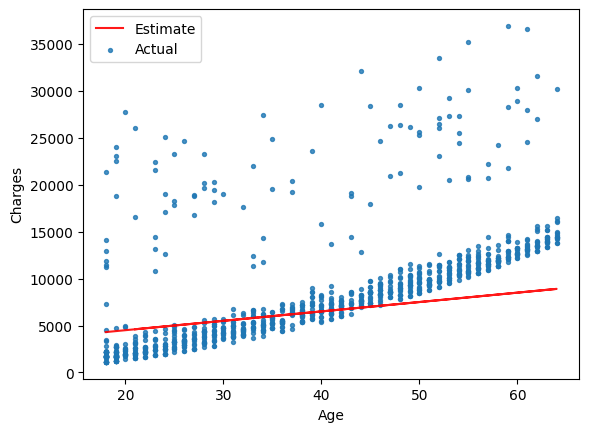

In [61]:
import matplotlib.pyplot as plt
non_smoker_df = data[data.smoker == 'no']
try_parameters(non_smoker_df, 100, 2500)

**Відповідь 5** Варіант 1
w=100, b=2500
пряма повинна більш різко зростати, змінюємо поки коефіціент w - збільшуємо

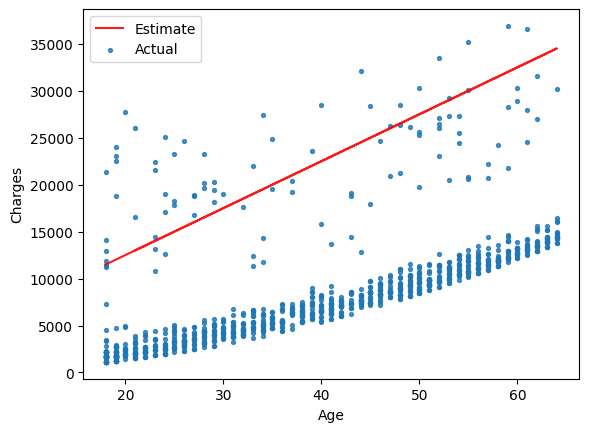

In [62]:
try_parameters(non_smoker_df, 500, 2500)

**Відповідь 5** Варіант 2
w=500, b=2500
W збільшили надмірно, кут нахилу більше, ніж потрібно, зменшуємо раза в 2 значення w. Перетин осі y також змінився - він тепер десь далеко зліва в мінусових значеннях x, тому потрібно значно зменшити x до мінусів.

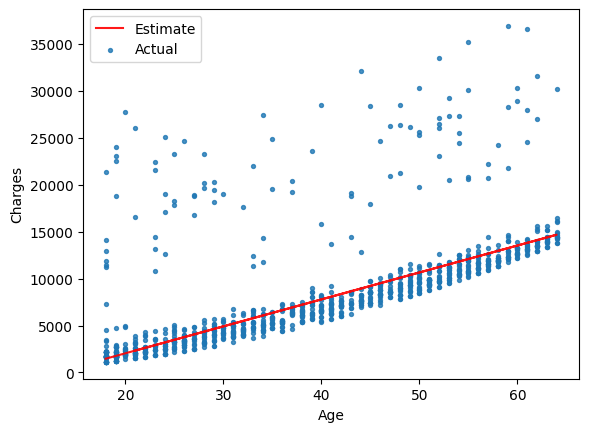

In [76]:
try_parameters(non_smoker_df, 287, -3700)

**Відповідь 5** Варіант 3
w=287, b=-3700
При таких коефіціентах кут нахилу відповідає нахилу основної групи значень плюс пряма не зовсім внизу, враховуючи наявність значної кількості викидів

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [64]:
import numpy as np
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
targets = non_smoker_df.charges
ages = non_smoker_df.age

In [75]:
# Варіант 1
w=100
b=2500
predictions = estimate_charges(ages, w, b)
rmse_1 = round(rmse(targets, predictions))
print(rmse_1)

# Варіант 2
w=500
b=2500
predictions = estimate_charges(ages, w, b)
rmse_2 = round(rmse(targets, predictions))
print(rmse_2)

# Варіант 3
w=287
b=-3700
predictions = estimate_charges(ages, w, b)
rmse_3 = round(rmse(targets, predictions))
print(rmse_3)



5591
14892
4744


**Відповідь 6**
Помилка, зрозуміло, найменша із трьох для останнього варіанту. Але вона все одно досить велика в порівнянні з середнім відхиленням (5994). Для досягнення мінімального значення помилки RMSE можна посунути пряму по вертикалі. Можливо, є більш точне значення, яке також більш точно враховуватиме наявність викидів. Я намагалася розташувати пряму у верхній частині основної групи значень, не посередині.

In [78]:
non_smoker_df.charges.describe()

,charges
count,1064.000000
mean,8434.268298
std,5993.781819
min,1121.873900
25%,3986.438700
50%,7345.405300
75%,11362.887050
max,36910.608030
